# Modelado de Machine Learning
## Dataset: YouToxic English 1000 - Clasificación de Comentarios Tóxicos

Este notebook contiene el entrenamiento y evaluación de múltiples modelos de Machine Learning para detectar comentarios tóxicos.


## 1. Importación de librerías

Importamos todas las librerías necesarias para el modelado y evaluación.


In [58]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np
import pickle

# Librerías para modelos de ML
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Librerías para evaluación
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas correctamente")


✅ Librerías importadas correctamente


## 2. Carga de datos vectorizados

Cargamos las matrices vectorizadas y las variables objetivo que guardamos en el notebook de features.


In [59]:
# Cargar matrices TF-IDF
print("Cargando matrices TF-IDF...")
with open('../data/processed/X_train_tfidf.pkl', 'rb') as f:
    X_train_tfidf = pickle.load(f)
with open('../data/processed/X_test_tfidf.pkl', 'rb') as f:
    X_test_tfidf = pickle.load(f)

# Cargar matrices Count Vectorizer
print("Cargando matrices Count Vectorizer...")
with open('../data/processed/X_train_count.pkl', 'rb') as f:
    X_train_count = pickle.load(f)
with open('../data/processed/X_test_count.pkl', 'rb') as f:
    X_test_count = pickle.load(f)

# Cargar variables objetivo
print("Cargando variables objetivo...")
with open('../data/processed/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)
with open('../data/processed/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

print("\n✅ Datos cargados correctamente")
print(f"\nFormas de los datos:")
print(f"X_train_tfidf: {X_train_tfidf.shape}")
print(f"X_test_tfidf: {X_test_tfidf.shape}")
print(f"X_train_count: {X_train_count.shape}")
print(f"X_test_count: {X_test_count.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


Cargando matrices TF-IDF...
Cargando matrices Count Vectorizer...
Cargando variables objetivo...

✅ Datos cargados correctamente

Formas de los datos:
X_train_tfidf: (800, 1767)
X_test_tfidf: (200, 1767)
X_train_count: (800, 1767)
X_test_count: (200, 1767)
y_train: (800,)
y_test: (200,)


## 3. Función de evaluación

Creamos una función para evaluar los modelos de forma consistente.


In [60]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, vectorizer_name):
    """
    Evalúa un modelo y retorna un diccionario con las métricas.
    
    Args:
        model: Modelo entrenado
        X_train: Datos de entrenamiento
        X_test: Datos de prueba
        y_train: Etiquetas de entrenamiento
        y_test: Etiquetas de prueba
        model_name: Nombre del modelo
        vectorizer_name: Nombre del vectorizador usado
        
    Returns:
        dict: Diccionario con métricas
    """
    # Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Métricas de entrenamiento
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Métricas de prueba
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # Diferencia entre train y test (para detectar overfitting)
    diff_accuracy = abs(train_accuracy - test_accuracy) * 100
    diff_f1 = abs(train_f1 - test_f1) * 100
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_test_pred)
    
    # Crear diccionario con resultados
    results = {
        'model_name': model_name,
        'vectorizer_name': vectorizer_name,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_precision': train_precision,
        'test_precision': test_precision,
        'train_recall': train_recall,
        'test_recall': test_recall,
        'train_f1': train_f1,
        'test_f1': test_f1,
        'diff_accuracy': diff_accuracy,
        'diff_f1': diff_f1,
        'confusion_matrix': cm,
        'y_test_pred': y_test_pred
    }
    
    return results


# Probar la función (solo para verificar que funciona)
print("✅ Función de evaluación creada")


✅ Función de evaluación creada


## 4. Entrenamiento de Modelos

Vamos a entrenar múltiples modelos con ambas vectorizaciones y comparar resultados.


In [61]:
# Lista para almacenar todos los resultados
all_results = []

print("="*80)
print("ENTRENAMIENTO DE MODELOS")
print("="*80)


ENTRENAMIENTO DE MODELOS


### 4.1 Naive Bayes con TF-IDF


In [62]:
print("\n" + "-"*80)
print("1. Naive Bayes con TF-IDF")
print("-"*80)

# Crear y entrenar modelo
nb_tfidf = MultinomialNB()
print("Entrenando modelo...")
nb_tfidf.fit(X_train_tfidf, y_train)

# Evaluar
results_nb_tfidf = evaluate_model(
    nb_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test,
    "Naive Bayes", "TF-IDF"
)
all_results.append(results_nb_tfidf)

# Mostrar resultados
print(f"\n📊 Resultados:")
print(f"   Accuracy (train): {results_nb_tfidf['train_accuracy']:.4f}")
print(f"   Accuracy (test):  {results_nb_tfidf['test_accuracy']:.4f}")
print(f"   F1-score (train): {results_nb_tfidf['train_f1']:.4f}")
print(f"   F1-score (test):  {results_nb_tfidf['test_f1']:.4f}")
print(f"   Diferencia accuracy: {results_nb_tfidf['diff_accuracy']:.2f}%")
print(f"   Diferencia F1: {results_nb_tfidf['diff_f1']:.2f}%")



--------------------------------------------------------------------------------
1. Naive Bayes con TF-IDF
--------------------------------------------------------------------------------
Entrenando modelo...

📊 Resultados:
   Accuracy (train): 0.9313
   Accuracy (test):  0.6900
   F1-score (train): 0.9241
   F1-score (test):  0.6265
   Diferencia accuracy: 24.13%
   Diferencia F1: 29.76%


### 4.2 Naive Bayes con Count Vectorizer


In [63]:
print("\n" + "-"*80)
print("2. Naive Bayes con Count Vectorizer")
print("-"*80)

# Crear y entrenar modelo
nb_count = MultinomialNB()
print("Entrenando modelo...")
nb_count.fit(X_train_count, y_train)

# Evaluar
results_nb_count = evaluate_model(
    nb_count, X_train_count, X_test_count, y_train, y_test,
    "Naive Bayes", "Count Vectorizer"
)
all_results.append(results_nb_count)

# Mostrar resultados
print(f"\n📊 Resultados:")
print(f"   Accuracy (train): {results_nb_count['train_accuracy']:.4f}")
print(f"   Accuracy (test):  {results_nb_count['test_accuracy']:.4f}")
print(f"   F1-score (train): {results_nb_count['train_f1']:.4f}")
print(f"   F1-score (test):  {results_nb_count['test_f1']:.4f}")
print(f"   Diferencia accuracy: {results_nb_count['diff_accuracy']:.2f}%")
print(f"   Diferencia F1: {results_nb_count['diff_f1']:.2f}%")



--------------------------------------------------------------------------------
2. Naive Bayes con Count Vectorizer
--------------------------------------------------------------------------------
Entrenando modelo...

📊 Resultados:
   Accuracy (train): 0.8888
   Accuracy (test):  0.6500
   F1-score (train): 0.8843
   F1-score (test):  0.6237
   Diferencia accuracy: 23.88%
   Diferencia F1: 26.06%


### 4.3 Logistic Regression con TF-IDF


In [64]:
print("\n" + "-"*80)
print("3. Logistic Regression con TF-IDF")
print("-"*80)

# Crear y entrenar modelo
lr_tfidf = LogisticRegression(random_state=42, max_iter=1000)
print("Entrenando modelo...")
lr_tfidf.fit(X_train_tfidf, y_train)

# Evaluar
results_lr_tfidf = evaluate_model(
    lr_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test,
    "Logistic Regression", "TF-IDF"
)
all_results.append(results_lr_tfidf)

# Mostrar resultados
print(f"\n📊 Resultados:")
print(f"   Accuracy (train): {results_lr_tfidf['train_accuracy']:.4f}")
print(f"   Accuracy (test):  {results_lr_tfidf['test_accuracy']:.4f}")
print(f"   F1-score (train): {results_lr_tfidf['train_f1']:.4f}")
print(f"   F1-score (test):  {results_lr_tfidf['test_f1']:.4f}")
print(f"   Diferencia accuracy: {results_lr_tfidf['diff_accuracy']:.2f}%")
print(f"   Diferencia F1: {results_lr_tfidf['diff_f1']:.2f}%")



--------------------------------------------------------------------------------
3. Logistic Regression con TF-IDF
--------------------------------------------------------------------------------
Entrenando modelo...

📊 Resultados:
   Accuracy (train): 0.9225
   Accuracy (test):  0.7100
   F1-score (train): 0.9122
   F1-score (test):  0.6375
   Diferencia accuracy: 21.25%
   Diferencia F1: 27.47%


### 4.4 Logistic Regression con Count Vectorizer


In [65]:
print("\n" + "-"*80)
print("4. Logistic Regression con Count Vectorizer")
print("-"*80)

# Crear y entrenar modelo
lr_count = LogisticRegression(random_state=42, max_iter=1000)
print("Entrenando modelo...")
lr_count.fit(X_train_count, y_train)

# Evaluar
results_lr_count = evaluate_model(
    lr_count, X_train_count, X_test_count, y_train, y_test,
    "Logistic Regression", "Count Vectorizer"
)
all_results.append(results_lr_count)

# Mostrar resultados
print(f"\n📊 Resultados:")
print(f"   Accuracy (train): {results_lr_count['train_accuracy']:.4f}")
print(f"   Accuracy (test):  {results_lr_count['test_accuracy']:.4f}")
print(f"   F1-score (train): {results_lr_count['train_f1']:.4f}")
print(f"   F1-score (test):  {results_lr_count['test_f1']:.4f}")
print(f"   Diferencia accuracy: {results_lr_count['diff_accuracy']:.2f}%")
print(f"   Diferencia F1: {results_lr_count['diff_f1']:.2f}%")



--------------------------------------------------------------------------------
4. Logistic Regression con Count Vectorizer
--------------------------------------------------------------------------------
Entrenando modelo...

📊 Resultados:
   Accuracy (train): 0.9712
   Accuracy (test):  0.7200
   F1-score (train): 0.9682
   F1-score (test):  0.6456
   Diferencia accuracy: 25.12%
   Diferencia F1: 32.26%


### 4.5 SVM con TF-IDF


In [66]:
print("\n" + "-"*80)
print("5. SVM con TF-IDF")
print("-"*80)

# Crear y entrenar modelo (usamos kernel lineal para ser más rápido)
svm_tfidf = SVC(kernel='linear', random_state=42, probability=True)
print("Entrenando modelo... (esto puede tardar unos minutos)")
svm_tfidf.fit(X_train_tfidf, y_train)

# Evaluar
results_svm_tfidf = evaluate_model(
    svm_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test,
    "SVM", "TF-IDF"
)
all_results.append(results_svm_tfidf)

# Mostrar resultados
print(f"\n📊 Resultados:")
print(f"   Accuracy (train): {results_svm_tfidf['train_accuracy']:.4f}")
print(f"   Accuracy (test):  {results_svm_tfidf['test_accuracy']:.4f}")
print(f"   F1-score (train): {results_svm_tfidf['train_f1']:.4f}")
print(f"   F1-score (test):  {results_svm_tfidf['test_f1']:.4f}")
print(f"   Diferencia accuracy: {results_svm_tfidf['diff_accuracy']:.2f}%")
print(f"   Diferencia F1: {results_svm_tfidf['diff_f1']:.2f}%")



--------------------------------------------------------------------------------
5. SVM con TF-IDF
--------------------------------------------------------------------------------
Entrenando modelo... (esto puede tardar unos minutos)

📊 Resultados:
   Accuracy (train): 0.9537
   Accuracy (test):  0.7300
   F1-score (train): 0.9495
   F1-score (test):  0.6897
   Diferencia accuracy: 22.38%
   Diferencia F1: 25.99%


### 4.6 SVM con Count Vectorizer


In [67]:
print("\n" + "-"*80)
print("6. SVM con Count Vectorizer")
print("-"*80)

# Crear y entrenar modelo
svm_count = SVC(kernel='linear', random_state=42, probability=True)
print("Entrenando modelo... (esto puede tardar unos minutos)")
svm_count.fit(X_train_count, y_train)

# Evaluar
results_svm_count = evaluate_model(
    svm_count, X_train_count, X_test_count, y_train, y_test,
    "SVM", "Count Vectorizer"
)
all_results.append(results_svm_count)

# Mostrar resultados
print(f"\n📊 Resultados:")
print(f"   Accuracy (train): {results_svm_count['train_accuracy']:.4f}")
print(f"   Accuracy (test):  {results_svm_count['test_accuracy']:.4f}")
print(f"   F1-score (train): {results_svm_count['train_f1']:.4f}")
print(f"   F1-score (test):  {results_svm_count['test_f1']:.4f}")
print(f"   Diferencia accuracy: {results_svm_count['diff_accuracy']:.2f}%")
print(f"   Diferencia F1: {results_svm_count['diff_f1']:.2f}%")



--------------------------------------------------------------------------------
6. SVM con Count Vectorizer
--------------------------------------------------------------------------------
Entrenando modelo... (esto puede tardar unos minutos)

📊 Resultados:
   Accuracy (train): 0.9888
   Accuracy (test):  0.7000
   F1-score (train): 0.9878
   F1-score (test):  0.6429
   Diferencia accuracy: 28.88%
   Diferencia F1: 34.49%


### 4.7 Random Forest con TF-IDF


In [68]:
print("\n" + "-"*80)
print("7. Random Forest con TF-IDF")
print("-"*80)

# Crear y entrenar modelo (limitamos árboles para ser más rápido)
rf_tfidf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("Entrenando modelo...")
rf_tfidf.fit(X_train_tfidf, y_train)

# Evaluar
results_rf_tfidf = evaluate_model(
    rf_tfidf, X_train_tfidf, X_test_tfidf, y_train, y_test,
    "Random Forest", "TF-IDF"
)
all_results.append(results_rf_tfidf)

# Mostrar resultados
print(f"\n📊 Resultados:")
print(f"   Accuracy (train): {results_rf_tfidf['train_accuracy']:.4f}")
print(f"   Accuracy (test):  {results_rf_tfidf['test_accuracy']:.4f}")
print(f"   F1-score (train): {results_rf_tfidf['train_f1']:.4f}")
print(f"   F1-score (test):  {results_rf_tfidf['test_f1']:.4f}")
print(f"   Diferencia accuracy: {results_rf_tfidf['diff_accuracy']:.2f}%")
print(f"   Diferencia F1: {results_rf_tfidf['diff_f1']:.2f}%")



--------------------------------------------------------------------------------
7. Random Forest con TF-IDF
--------------------------------------------------------------------------------
Entrenando modelo...

📊 Resultados:
   Accuracy (train): 0.9962
   Accuracy (test):  0.7300
   F1-score (train): 0.9959
   F1-score (test):  0.6707
   Diferencia accuracy: 26.62%
   Diferencia F1: 32.52%


### 4.8 Random Forest con Count Vectorizer


In [69]:
print("\n" + "-"*80)
print("8. Random Forest con Count Vectorizer")
print("-"*80)

# Crear y entrenar modelo
rf_count = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("Entrenando modelo...")
rf_count.fit(X_train_count, y_train)

# Evaluar
results_rf_count = evaluate_model(
    rf_count, X_train_count, X_test_count, y_train, y_test,
    "Random Forest", "Count Vectorizer"
)
all_results.append(results_rf_count)

# Mostrar resultados
print(f"\n📊 Resultados:")
print(f"   Accuracy (train): {results_rf_count['train_accuracy']:.4f}")
print(f"   Accuracy (test):  {results_rf_count['test_accuracy']:.4f}")
print(f"   F1-score (train): {results_rf_count['train_f1']:.4f}")
print(f"   F1-score (test):  {results_rf_count['test_f1']:.4f}")
print(f"   Diferencia accuracy: {results_rf_count['diff_accuracy']:.2f}%")
print(f"   Diferencia F1: {results_rf_count['diff_f1']:.2f}%")



--------------------------------------------------------------------------------
8. Random Forest con Count Vectorizer
--------------------------------------------------------------------------------
Entrenando modelo...

📊 Resultados:
   Accuracy (train): 0.9962
   Accuracy (test):  0.7200
   F1-score (train): 0.9959
   F1-score (test):  0.6543
   Diferencia accuracy: 27.62%
   Diferencia F1: 34.16%


## 5. Comparación de Modelos

Creamos una tabla comparativa con todos los resultados.


In [70]:
# Crear DataFrame con todos los resultados
results_df = pd.DataFrame([
    {
        'Modelo': r['model_name'],
        'Vectorizador': r['vectorizer_name'],
        'Accuracy Train': f"{r['train_accuracy']:.4f}",
        'Accuracy Test': f"{r['test_accuracy']:.4f}",
        'F1 Train': f"{r['train_f1']:.4f}",
        'F1 Test': f"{r['test_f1']:.4f}",
        'Diff Accuracy (%)': f"{r['diff_accuracy']:.2f}",
        'Diff F1 (%)': f"{r['diff_f1']:.2f}",
        'Precision Test': f"{r['test_precision']:.4f}",
        'Recall Test': f"{r['test_recall']:.4f}"
    }
    for r in all_results
])

print("="*100)
print("COMPARACIÓN DE TODOS LOS MODELOS")
print("="*100)
print(results_df.to_string(index=False))


COMPARACIÓN DE TODOS LOS MODELOS
             Modelo     Vectorizador Accuracy Train Accuracy Test F1 Train F1 Test Diff Accuracy (%) Diff F1 (%) Precision Test Recall Test
        Naive Bayes           TF-IDF         0.9313        0.6900   0.9241  0.6265             24.13       29.76         0.7027      0.5652
        Naive Bayes Count Vectorizer         0.8888        0.6500   0.8843  0.6237             23.88       26.06         0.6170      0.6304
Logistic Regression           TF-IDF         0.9225        0.7100   0.9122  0.6375             21.25       27.47         0.7500      0.5543
Logistic Regression Count Vectorizer         0.9712        0.7200   0.9682  0.6456             25.12       32.26         0.7727      0.5543
                SVM           TF-IDF         0.9537        0.7300   0.9495  0.6897             22.38       25.99         0.7317      0.6522
                SVM Count Vectorizer         0.9888        0.7000   0.9878  0.6429             28.88       34.49         0.7105

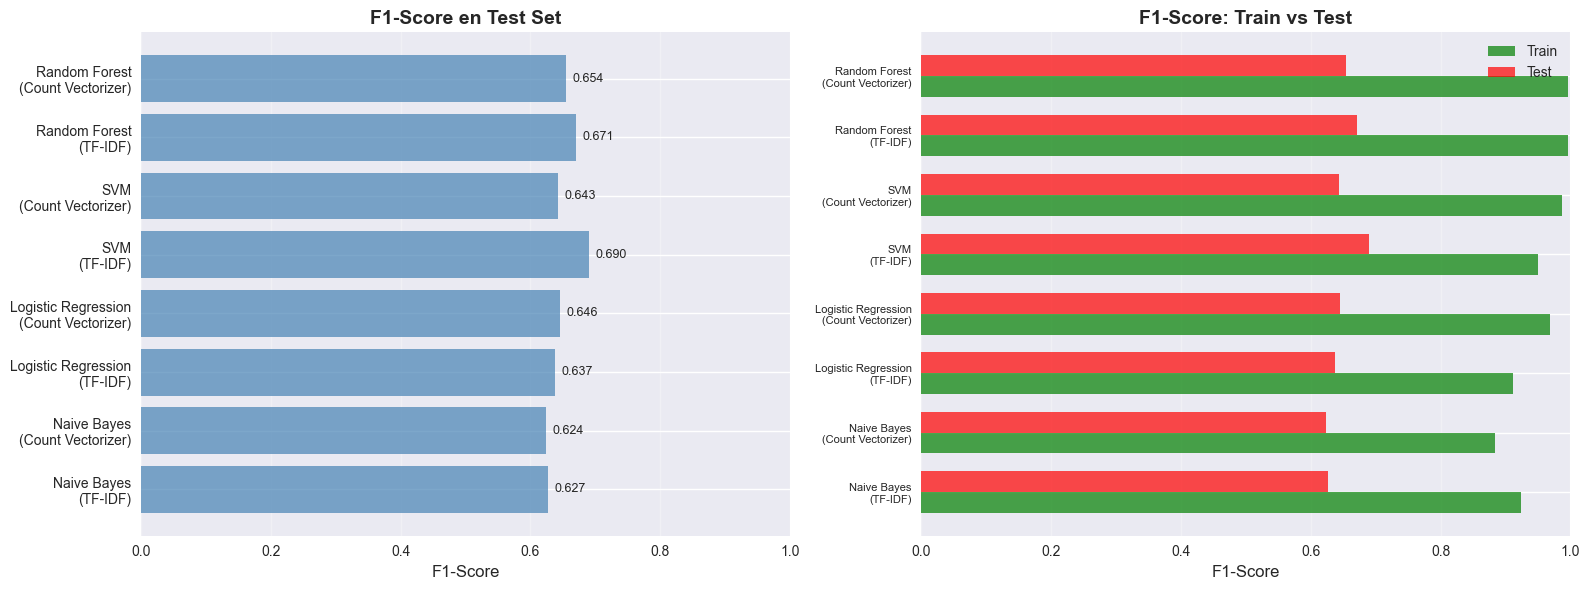

In [71]:
# Visualización: Comparación de F1-scores
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# F1-score en test
models_names = [f"{r['model_name']}\n({r['vectorizer_name']})" for r in all_results]
f1_scores_test = [r['test_f1'] for r in all_results]
f1_scores_train = [r['train_f1'] for r in all_results]

axes[0].barh(models_names, f1_scores_test, color='steelblue', alpha=0.7)
axes[0].set_xlabel('F1-Score', fontsize=12)
axes[0].set_title('F1-Score en Test Set', fontsize=14, fontweight='bold')
axes[0].set_xlim([0, 1])
axes[0].grid(axis='x', alpha=0.3)

# Agregar valores en las barras
for i, v in enumerate(f1_scores_test):
    axes[0].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)

# Comparación Train vs Test
x_pos = np.arange(len(models_names))
width = 0.35

axes[1].barh(x_pos - width/2, f1_scores_train, width, label='Train', alpha=0.7, color='green')
axes[1].barh(x_pos + width/2, f1_scores_test, width, label='Test', alpha=0.7, color='red')
axes[1].set_yticks(x_pos)
axes[1].set_yticklabels(models_names, fontsize=8)
axes[1].set_xlabel('F1-Score', fontsize=12)
axes[1].set_title('F1-Score: Train vs Test', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].set_xlim([0, 1])
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Selección del Mejor Modelo

Identificamos el mejor modelo basado en F1-score y control de overfitting.


In [72]:
# Encontrar el mejor modelo (mayor F1 en test, con diferencia train/test < 5%)
best_model = None
best_score = 0
best_result = None
best_model_name = None

# También guardar el mejor modelo sin restricción de overfitting (fallback)
best_score_no_restriction = 0
best_result_no_restriction = None
best_model_name_no_restriction = None

print("="*80)
print("SELECCIÓN DEL MEJOR MODELO")
print("="*80)
print("\nCriterios:")
print("  1. Mayor F1-score en test")
print("  2. Diferencia train/test < 5% (sin overfitting)")

# Buscar mejor modelo sin overfitting
for result in all_results:
    # Verificar que no hay overfitting
    if result['diff_f1'] < 5.0:  # Diferencia menor a 5 puntos porcentuales
        if result['test_f1'] > best_score:
            best_score = result['test_f1']
            best_result = result
            best_model_name = f"{result['model_name']} + {result['vectorizer_name']}"
    
    # También guardar el mejor sin restricción (por si no hay ninguno sin overfitting)
    if result['test_f1'] > best_score_no_restriction:
        best_score_no_restriction = result['test_f1']
        best_result_no_restriction = result
        best_model_name_no_restriction = f"{result['model_name']} + {result['vectorizer_name']}"

# Si no encontramos ningún modelo sin overfitting, usar el mejor disponible
if best_model_name is None:
    print("\n⚠️  ADVERTENCIA: Ningún modelo cumple el criterio de diferencia < 5%")
    print("   Seleccionando el mejor modelo por F1-score (puede tener overfitting)")
    best_model_name = best_model_name_no_restriction
    best_result = best_result_no_restriction
    best_score = best_score_no_restriction
    has_overfitting = True
else:
    has_overfitting = False

print(f"\n🏆 MEJOR MODELO: {best_model_name}")
print(f"   F1-score (test): {best_result['test_f1']:.4f}")
print(f"   Accuracy (test): {best_result['test_accuracy']:.4f}")
print(f"   Precision (test): {best_result['test_precision']:.4f}")
print(f"   Recall (test): {best_result['test_recall']:.4f}")
print(f"   Diferencia F1 (train-test): {best_result['diff_f1']:.2f}%")
if has_overfitting:
    print(f"   ⚠️  Tiene overfitting (diferencia >= 5%)")
else:
    print(f"   ✅ Sin overfitting (diferencia < 5%)")


SELECCIÓN DEL MEJOR MODELO

Criterios:
  1. Mayor F1-score en test
  2. Diferencia train/test < 5% (sin overfitting)

⚠️  ADVERTENCIA: Ningún modelo cumple el criterio de diferencia < 5%
   Seleccionando el mejor modelo por F1-score (puede tener overfitting)

🏆 MEJOR MODELO: SVM + TF-IDF
   F1-score (test): 0.6897
   Accuracy (test): 0.7300
   Precision (test): 0.7317
   Recall (test): 0.6522
   Diferencia F1 (train-test): 25.99%
   ⚠️  Tiene overfitting (diferencia >= 5%)


In [73]:
# Verificar que best_model_name está definido
if 'best_model_name' not in locals() or best_model_name is None:
    print("⚠️  ERROR: best_model_name no está definido.")
    print("   Por favor, ejecuta primero la celda de selección del mejor modelo (celda anterior).")
    raise NameError("best_model_name no está definido. Ejecuta la celda anterior primero.")

# Obtener el modelo entrenado correspondiente
model_mapping = {
    'Naive Bayes + TF-IDF': nb_tfidf,
    'Naive Bayes + Count Vectorizer': nb_count,
    'Logistic Regression + TF-IDF': lr_tfidf,
    'Logistic Regression + Count Vectorizer': lr_count,
    'SVM + TF-IDF': svm_tfidf,
    'SVM + Count Vectorizer': svm_count,
    'Random Forest + TF-IDF': rf_tfidf,
    'Random Forest + Count Vectorizer': rf_count
}

if best_model_name not in model_mapping:
    print(f"⚠️  ERROR: {best_model_name} no está en el mapeo de modelos.")
    raise KeyError(f"Modelo {best_model_name} no encontrado en model_mapping")

best_model = model_mapping[best_model_name]

# Determinar qué vectorizador usar
if 'TF-IDF' in best_model_name:
    best_X_train = X_train_tfidf
    best_X_test = X_test_tfidf
    vectorizer_type = 'tfidf'
else:
    best_X_train = X_train_count
    best_X_test = X_test_count
    vectorizer_type = 'count'

print(f"\n✅ Modelo seleccionado: {best_model_name}")
print(f"   Tipo de vectorizador: {vectorizer_type}")



✅ Modelo seleccionado: SVM + TF-IDF
   Tipo de vectorizador: tfidf


## 7. Matriz de Confusión del Mejor Modelo

Visualizamos la matriz de confusión del mejor modelo.


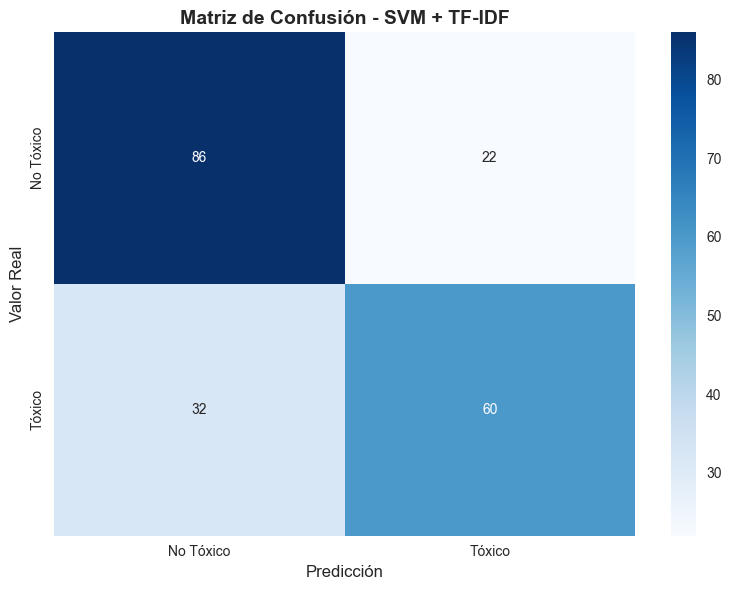


Desglose de la matriz de confusión:
   Verdaderos Negativos (TN): 86
   Falsos Positivos (FP): 22
   Falsos Negativos (FN): 32
   Verdaderos Positivos (TP): 60


In [74]:
# Verificar que best_result está definido
if 'best_result' not in locals() or best_result is None:
    print("⚠️  ERROR: best_result no está definido.")
    print("   Por favor, ejecuta primero la celda de selección del mejor modelo.")
    raise NameError("best_result no está definido. Ejecuta la celda de selección primero.")

# Matriz de confusión del mejor modelo
cm = best_result['confusion_matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Tóxico', 'Tóxico'],
            yticklabels=['No Tóxico', 'Tóxico'])
plt.title(f'Matriz de Confusión - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Predicción', fontsize=12)
plt.tight_layout()
plt.show()

# Calcular métricas adicionales
tn, fp, fn, tp = cm.ravel()
print(f"\nDesglose de la matriz de confusión:")
print(f"   Verdaderos Negativos (TN): {tn}")
print(f"   Falsos Positivos (FP): {fp}")
print(f"   Falsos Negativos (FN): {fn}")
print(f"   Verdaderos Positivos (TP): {tp}")


## 8. Reporte de Clasificación Detallado

Generamos un reporte detallado del mejor modelo.


In [75]:
# Verificar que best_result está definido
if 'best_result' not in locals() or best_result is None:
    print("⚠️  ERROR: best_result no está definido.")
    print("   Por favor, ejecuta primero la celda de selección del mejor modelo.")
    raise NameError("best_result no está definido. Ejecuta la celda de selección primero.")

# Reporte de clasificación completo
print("="*80)
print(f"REPORTE DE CLASIFICACIÓN - {best_model_name}")
print("="*80)
print("\n" + classification_report(y_test, best_result['y_test_pred'], 
                                  target_names=['No Tóxico', 'Tóxico']))


REPORTE DE CLASIFICACIÓN - SVM + TF-IDF

              precision    recall  f1-score   support

   No Tóxico       0.73      0.80      0.76       108
      Tóxico       0.73      0.65      0.69        92

    accuracy                           0.73       200
   macro avg       0.73      0.72      0.73       200
weighted avg       0.73      0.73      0.73       200



## 9. Guardar el Mejor Modelo

Guardamos el mejor modelo entrenado para usarlo después.


In [76]:
# Verificar que todas las variables necesarias están definidas
if 'best_model_name' not in locals() or best_model_name is None:
    print("⚠️  ERROR: best_model_name no está definido.")
    raise NameError("best_model_name no está definido. Ejecuta la celda de selección primero.")

if 'best_model' not in locals() or best_model is None:
    print("⚠️  ERROR: best_model no está definido.")
    raise NameError("best_model no está definido. Ejecuta la celda de mapeo de modelos primero.")

if 'best_result' not in locals() or best_result is None:
    print("⚠️  ERROR: best_result no está definido.")
    raise NameError("best_result no está definido. Ejecuta la celda de selección primero.")

# Guardar el mejor modelo
import os
os.makedirs('../models', exist_ok=True)

model_filename = f'../models/best_model_{best_model_name.replace(" ", "_").replace("+", "_").lower()}.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"✅ Mejor modelo guardado en: {model_filename}")

# Guardar también información del mejor modelo
best_model_info = {
    'model_name': best_model_name,
    'vectorizer_type': vectorizer_type,
    'test_accuracy': best_result['test_accuracy'],
    'test_f1': best_result['test_f1'],
    'test_precision': best_result['test_precision'],
    'test_recall': best_result['test_recall'],
    'diff_f1': best_result['diff_f1']
}

with open('../models/best_model_info.pkl', 'wb') as f:
    pickle.dump(best_model_info, f)

print(f"✅ Información del modelo guardada en: ../models/best_model_info.pkl")


✅ Mejor modelo guardado en: ../models/best_model_svm___tf-idf.pkl
✅ Información del modelo guardada en: ../models/best_model_info.pkl


## 10. Resumen Final

Resumen de todos los modelos entrenados y conclusiones.


In [77]:
print("="*80)
print("RESUMEN DEL MODELADO")
print("="*80)

print(f"\n1. MODELOS ENTRENADOS: {len(all_results)}")
for i, result in enumerate(all_results, 1):
    print(f"   {i}. {result['model_name']} + {result['vectorizer_name']}")

print(f"\n2. MEJOR MODELO:")
if 'best_model_name' in locals() and best_model_name is not None:
    print(f"   - Modelo: {best_model_name}")
    print(f"   - F1-score (test): {best_result['test_f1']:.4f}")
    print(f"   - Accuracy (test): {best_result['test_accuracy']:.4f}")
    print(f"   - Precision (test): {best_result['test_precision']:.4f}")
    print(f"   - Recall (test): {best_result['test_recall']:.4f}")
    print(f"   - Diferencia train/test: {best_result['diff_f1']:.2f}%")
else:
    print("   ⚠️  No se ha seleccionado un mejor modelo. Ejecuta la celda de selección primero.")

print(f"\n3. CONTROL DE OVERFITTING:")
overfitting_models = [r for r in all_results if r['diff_f1'] >= 5.0]
if overfitting_models:
    print(f"   ⚠️  Modelos con overfitting (diferencia >= 5%): {len(overfitting_models)}")
    for r in overfitting_models:
        print(f"      - {r['model_name']} + {r['vectorizer_name']}: {r['diff_f1']:.2f}%")
else:
    print(f"   ✅ Todos los modelos tienen diferencia < 5% (sin overfitting)")

print(f"\n4. COMPARACIÓN TF-IDF vs COUNT VECTORIZER:")
# Agrupar por modelo
models_comparison = {}
for r in all_results:
    model = r['model_name']
    if model not in models_comparison:
        models_comparison[model] = {}
    models_comparison[model][r['vectorizer_name']] = r['test_f1']

for model, vecs in models_comparison.items():
    if 'TF-IDF' in vecs and 'Count Vectorizer' in vecs:
        tfidf_f1 = vecs['TF-IDF']
        count_f1 = vecs['Count Vectorizer']
        better = 'TF-IDF' if tfidf_f1 > count_f1 else 'Count Vectorizer'
        print(f"   - {model}: {better} es mejor ({better}: {max(tfidf_f1, count_f1):.4f} vs {min(tfidf_f1, count_f1):.4f})")

print(f"\n5. PRÓXIMOS PASOS:")
print(f"   - Optimización de hiperparámetros del mejor modelo")
print(f"   - Validación cruzada para confirmar resultados")
print(f"   - Productivización del modelo (interfaz Streamlit)")

print("\n" + "="*80)


RESUMEN DEL MODELADO

1. MODELOS ENTRENADOS: 8
   1. Naive Bayes + TF-IDF
   2. Naive Bayes + Count Vectorizer
   3. Logistic Regression + TF-IDF
   4. Logistic Regression + Count Vectorizer
   5. SVM + TF-IDF
   6. SVM + Count Vectorizer
   7. Random Forest + TF-IDF
   8. Random Forest + Count Vectorizer

2. MEJOR MODELO:
   - Modelo: SVM + TF-IDF
   - F1-score (test): 0.6897
   - Accuracy (test): 0.7300
   - Precision (test): 0.7317
   - Recall (test): 0.6522
   - Diferencia train/test: 25.99%

3. CONTROL DE OVERFITTING:
   ⚠️  Modelos con overfitting (diferencia >= 5%): 8
      - Naive Bayes + TF-IDF: 29.76%
      - Naive Bayes + Count Vectorizer: 26.06%
      - Logistic Regression + TF-IDF: 27.47%
      - Logistic Regression + Count Vectorizer: 32.26%
      - SVM + TF-IDF: 25.99%
      - SVM + Count Vectorizer: 34.49%
      - Random Forest + TF-IDF: 32.52%
      - Random Forest + Count Vectorizer: 34.16%

4. COMPARACIÓN TF-IDF vs COUNT VECTORIZER:
   - Naive Bayes: TF-IDF es mejor 